# Problem 1 - Model Predictive Control

Creates the Quadrotor object and loads in the animation code.

**Re-run this block anytime you make change to `quadrotor.py`.**

## Simulate the quadrotor using MPC as the controller


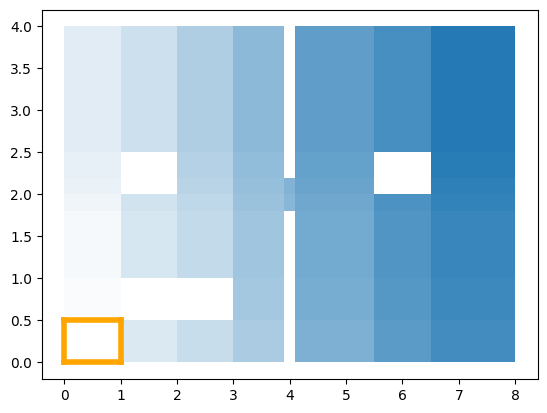


...planning...
Found plan at elapsed time: 17.460404 s
Tree size: 28
ETA: 123.0 s


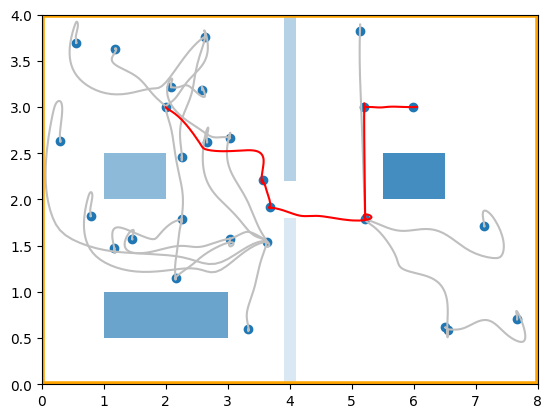

In [6]:
from path_planner_lqrrt import PathPlannerLQRRT
import importlib

# Need to reload the module to use the latest code
import quadrotor_with_pendulum
importlib.reload(quadrotor_with_pendulum)
from quadrotor_with_pendulum import QuadrotorPendulum
from animation import Animation
from obstacles import Obstacles

import matplotlib.pyplot as plt
import numpy as np

# Weights of LQR cost
R = np.eye(2)
Q = np.diag([10, 10, 1, 1, 1, 1, 1, 1])
Qf = Q

# Construct our quadrotor controller 
quadrotor = QuadrotorPendulum(Q, R, Qf, input_max=30)
obstacles = Obstacles("./configs/world_complex.yaml")
obstacles.plot(plt.gca(), plot_segs=True)
plt.show()

rrt = PathPlannerLQRRT("./configs/lqrrt.yaml", obstacles, quadrotor)
x0 = np.array([2, 3, 0, 0, 0, 0, 0, 0])
xf = np.array([6, 3, 0, 0, 0, 0, 0, 0])

planner = rrt.get_planner(x0, xf)
rrt.plot_result(planner)

<a style='text-decoration:none;line-height:16px;display:flex;color:#5B5B62;padding:10px;justify-content:end;' href='https://deepnote.com?utm_source=created-in-deepnote-cell&projectId=bc24b42c-2384-48c3-b1e2-6f6c0205f5f5' target="_blank">
 </img>
Created in <span style='font-weight:600;margin-left:4px;'>Deepnote</span></a>

In [7]:
t, x, u = rrt.interpolate_trajectory(planner)
anime = Animation(obstacles, quadrotor)
anime.set_trajectory(x)
anime.animate()